In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KDTree

import initialConditions as ic
import kernel as kernel
import smoothingLength as sl
import timeStep as ts
import functions as func

from params import par
for key,val in par.items():
    exec(key + '=val')

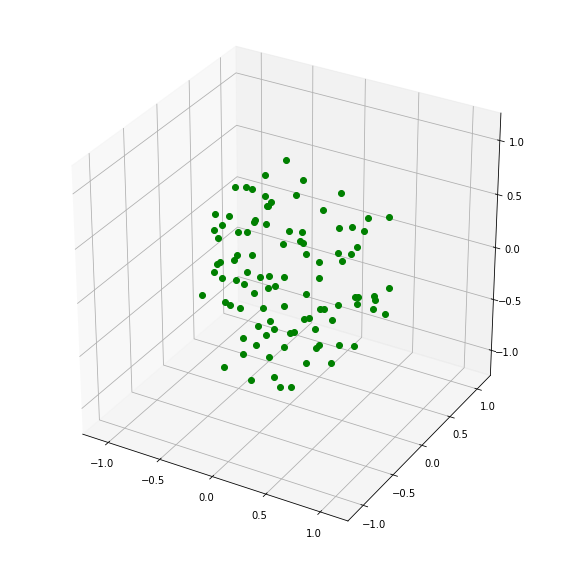

In [2]:
positions = ic.placement_uniform_sphere()
xrange = -1.2*r0 , 1.2*r0

fig = plt.figure(figsize=(10,10))
ax  = fig.gca(projection='3d')

ax.plot(positions[:,0],positions[:,1],positions[:,2], 'go')
ax.set_aspect(1)
ax.set_xlim(*xrange)
ax.set_ylim(*xrange)
ax.set_zlim(*xrange);

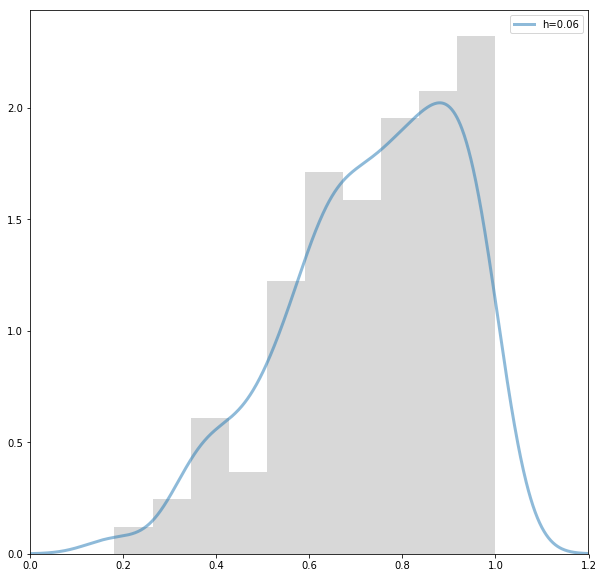

In [3]:
BW = np.linspace(0,1.0,50)

grid        =   GridSearchCV(KernelDensity(), {'bandwidth': BW}, cv=20)
distances   =   func.find_distances(positions)
grid.fit(distances[:,None])

xlim = 0 , 1.2*np.max(distances)
xplot = np.linspace(*xlim,1000)

kde = grid.best_estimator_
smoothingL = kde.bandwidth
pdf = np.exp( kde.score_samples( xplot[:,None]))

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(xplot,pdf,linewidth=3,alpha=0.5,label='h=%.2f' % smoothingL)
ax.hist(distances,10,fc='gray',histtype='stepfilled',alpha=0.3,normed=True)
ax.legend(loc='best')
ax.set_xlim(*xlim);

In [13]:
tree = KDTree(positions)           
W = tree.kernel_density(positions, h=0.1, kernel='gaussian')
W.shape,W

# size = 100 

# xplot = np.linspace(*xrange,size)
# z1 = np.zeros( (size,size) )
# z2 = np.zeros_like(z1)

# for i,x1 in enumerate(xplot):
#     for j,x2 in enumerate(xplot):
#         pos1    =   np.array([x1,x2,0])
#         pos2    =   np.array([0,x1,x2])
#         z1[i,j] =   func.find_density(pos1,positions,smoothingL)
#         z2[i,j] =   func.find_density(pos2,positions,smoothingL)

# fig,ax = plt.subplots(1,2,figsize=(20,10))
# ax[0].contourf(xplot,xplot,z1,100,cmap=cm.hot)
# ax[1].contourf(xplot,xplot,z2,100,cmap=cm.hot)
# ax[0].set_title('xy-plane',fontsize=20)
# ax[1].set_title('yz-plane',fontsize=20)

((100,), array([ 67.51267556,  71.93153226,  77.14184587,  64.08058661,
         64.62811999,  66.88425807, 112.34064117, 109.48339624,
         68.24770408,  65.07362091, 115.78925483,  80.31741225,
        150.23258992,  94.25006741,  69.85058604,  66.02418717,
         73.93227674,  74.92073376,  67.26585752,  69.48739674,
         70.77680918,  69.76515193,  84.24113948,  92.83413852,
         88.08434848,  64.94297499, 109.49107567, 101.65499295,
         72.08364998,  65.05689077, 146.23799665,  70.22404956,
         69.30661303,  65.11013727,  73.16657729,  67.93502156,
         64.59141659,  65.67076297,  66.47194167,  66.75776283,
        108.05875244,  81.72893515, 125.66786583,  81.33730951,
        100.87625332,  68.89113875, 123.84654858,  66.32668146,
         92.06397379,  95.5784852 ,  66.0105366 ,  69.06459407,
         78.5897768 ,  75.26184806,  77.93074518,  92.84174303,
         69.09638861,  63.79295002,  76.30088422, 147.48036435,
        104.03280785, 116.246694